In [2]:
import pandas as pd
import numpy as np

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [7]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, sep=';')

1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [127]:
cols = data.columns
X = data[cols[:-1]]
y = data[cols[-1:]]
y = y - y.min() 


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

dt = DecisionTreeClassifier()
bc = BaggingClassifier(n_estimators=100)
rf = RandomForestClassifier(n_estimators=100)

dt.fit(X,y)
bc.fit(X,y)
rf.fit(X,y)

/home/denis/.local/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_24949/286115555.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X,y)


RandomForestClassifier()

In [36]:
from sklearn.model_selection import cross_val_score

dt_cvs = cross_val_score(dt,X,y[y.columns[0]])
bc_cvs = cross_val_score(bc,X,y[y.columns[0]])
rf_cvs = cross_val_score(rf,X,y[y.columns[0]])

print('DecisionTree accuracy: ' + str(dt_cvs.sum()/len(dt_cvs)))
print('BaggingClassifier accuracy: ' + str(bc_cvs.sum()/len(bc_cvs)))
print('RandomForest accuracy:' + str(rf_cvs.sum()/len(rf_cvs)))

DecisionTree accuracy: 0.48529780564263325
BaggingClassifier accuracy: 0.569114420062696
RandomForest accuracy:0.5709815830721003


2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [140]:
RANDOM_STATE = 42
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [44]:
n_size = [ 10 , 50, 100 , 200 ]
n_size += [ i for i in range(400,5001,200)]

In [47]:
rf = RandomForestClassifier(n_estimators=100)

mrf = rf.fit(X_train, y_train)

/tmp/ipykernel_24949/2864735185.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mrf = rf.fit(X_train, y_train)


In [106]:
acc = list([])
for i in n_size:
    rf = RandomForestClassifier(n_estimators=int(i))
    mrf = rf.fit(X_train,y_train[y_train.columns[0]])
    acc.append(mrf.score(X_test,y_test))

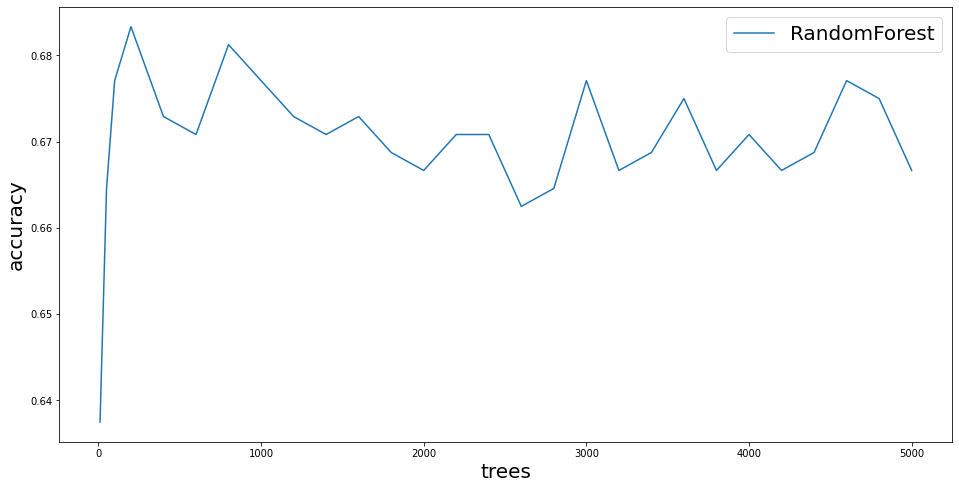

In [109]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))

plt.plot(n_size, acc, label='RandomForest')
plt.legend(loc='best', fontsize=20)
plt.xlabel('trees', fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

gbc = GradientBoostingClassifier()
xgb = XGBClassifier()


model_gbc = gbc.fit(X_train,y_train[y_train.columns[0]])
model_xgb = xgb.fit(X_train,y_train[y_train.columns[0]])


In [174]:

gbc_cvs = cross_val_score(model_gbc,X_train,y_train, cv=3, n_jobs=6).mean()
xgb_cvs = cross_val_score(model_xgb,X_train,y_train, cv=3).mean()

print('GradientBoosting accuracy: ' + str(gbc_cvs))
print('XGBoosting accuracy: ' + str(xgb_cvs))

/home/denis/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/denis/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/denis/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoosting accuracy: 0.6353887399463807
XGBoosting accuracy: 0.6380697050938338


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [168]:
from sklearn.model_selection import GridSearchCV 

params_opt = { 'n_estimators' : [100,200],
            'learning_rate' : [0.001, 0.01 ],
            'max_depth' : [3,4],
            'loss' : ('log_loss','exponential')}

In [171]:
gbc_gs = GridSearchCV(gbc, params_opt, n_jobs=6)

In [172]:
gbc_gs.fit(X_train,y_train[y_train.columns[0]])

/home/denis/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/denis/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/denis/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  File "/home/denis/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py", line 331, in _check_params
    self._loss = loss_class(self.n_classes_)
  File "/home/denis/.l

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=6,
             param_grid={'learning_rate': [0.001, 0.01],
                         'loss': ('log_loss', 'exponential'),
                         'max_depth': [3, 4], 'n_estimators': [100, 200]})

In [189]:
model_gbc_opt = gbc_gs.best_estimator_

In [176]:
xgb_gs = GridSearchCV(xgb, params_opt, n_jobs=6)
xgb_gs.fit(X_train,y_train[y_train.columns[0]])
model_xgb_opt = xgb_gs.best_estimator_

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resource

[23:45:54] WARNING: ../src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:45:54] WARNING: ../src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:45:54] WARNING: ../src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged 

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


[23:45:55] WARNING: ../src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


[23:45:55] WARNING: ../src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:45:55] WARNING: ../src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:45:57] WARNING: ../src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged 

In [177]:
model_xgb_opt

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, loss='log_loss', max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [133]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

lgbm = LGBMClassifier()
cb = CatBoostClassifier()

model_lgbm = lgbm.fit(X_train,y_train[y_train.columns[0]])
model_cb = cb.fit(X_train, y_train[y_train.columns[0]])

print('LGBM accuracy: ' + str(model_lgbm.score(X_test,y_test)))
print('CatBoost accuracy: ' + str(model_cb.score(X_test,y_test)))

Learning rate set to 0.079582
0:	learn: 1.6798836	total: 55.2ms	remaining: 55.1s
1:	learn: 1.5987518	total: 64ms	remaining: 31.9s
2:	learn: 1.5238132	total: 71.4ms	remaining: 23.7s
3:	learn: 1.4602113	total: 82.4ms	remaining: 20.5s
4:	learn: 1.4046420	total: 94.6ms	remaining: 18.8s
5:	learn: 1.3571609	total: 109ms	remaining: 18s
6:	learn: 1.3133440	total: 123ms	remaining: 17.4s
7:	learn: 1.2769983	total: 133ms	remaining: 16.5s
8:	learn: 1.2417352	total: 143ms	remaining: 15.7s
9:	learn: 1.2089482	total: 157ms	remaining: 15.6s
10:	learn: 1.1811884	total: 170ms	remaining: 15.3s
11:	learn: 1.1571506	total: 183ms	remaining: 15.1s
12:	learn: 1.1308868	total: 196ms	remaining: 14.8s
13:	learn: 1.1091579	total: 203ms	remaining: 14.3s
14:	learn: 1.0918378	total: 211ms	remaining: 13.9s
15:	learn: 1.0750740	total: 221ms	remaining: 13.6s
16:	learn: 1.0591980	total: 241ms	remaining: 14s
17:	learn: 1.0431556	total: 252ms	remaining: 13.8s
18:	learn: 1.0284858	total: 264ms	remaining: 13.6s
19:	learn: 1

In [ ]:
# CatBoost demonstates highest score 

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [178]:
from sklearn.model_selection import GridSearchCV 

params_opt = { 'n_estimators' : [100,200],
            'learning_rate' : [0.001, 0.01 ],
            'max_depth' : [3,4]
            }
lgbm_gs = GridSearchCV(lgbm, params_opt, n_jobs=6)
lgbm_gs.fit(X_train,y_train[y_train.columns[0]])
model_lgbm_opt = lgbm_gs.best_estimator_

cb_gs = GridSearchCV(cb, params_opt, n_jobs=6)
cb_gs.fit(X_train,y_train[y_train.columns[0]])
model_cb_opt = cb_gs.best_estimator_

0:	learn: 1.7905651	total: 62.6ms	remaining: 6.2s
1:	learn: 1.7890702	total: 69.2ms	remaining: 3.39s
0:	learn: 1.7902214	total: 92.1ms	remaining: 9.12s
0:	learn: 1.7904525	total: 97.4ms	remaining: 9.64s
2:	learn: 1.7876332	total: 130ms	remaining: 4.22s
1:	learn: 1.7890060	total: 123ms	remaining: 6.03s
0:	learn: 1.7905339	total: 103ms	remaining: 10.2s
2:	learn: 1.7875724	total: 127ms	remaining: 4.09s
1:	learn: 1.7892921	total: 111ms	remaining: 5.45s
3:	learn: 1.7861413	total: 137ms	remaining: 3.28s
4:	learn: 1.7847691	total: 147ms	remaining: 2.79s
3:	learn: 1.7861776	total: 158ms	remaining: 3.8s
5:	learn: 1.7834173	total: 157ms	remaining: 2.47s
6:	learn: 1.7819628	total: 162ms	remaining: 2.16s
7:	learn: 1.7808497	total: 169ms	remaining: 1.94s
8:	learn: 1.7793894	total: 174ms	remaining: 1.75s
1:	learn: 1.7887297	total: 177ms	remaining: 8.65s
9:	learn: 1.7779360	total: 178ms	remaining: 1.6s
10:	learn: 1.7766814	total: 182ms	remaining: 1.47s
11:	learn: 1.7752494	total: 185ms	remaining: 1.3

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [185]:
from hyperopt import tpe, hp, fmin 

def hyperopt_score(param):
    clf = XGBClassifier(**param)
    current_score = cross_val_score(clf, X_train, y_train, cv=3).mean()
    print(current_score, param)
    return current_score

params_opt = { 'n_estimators' : hp.choice('n_estimators',[100,200]),
            'learning_rate' : hp.choice('learning_rate',[0.001, 0.01 ]),
            'max_depth' : hp.choice('max_depth',[3,4]),
             }

best = fmin(fn=hyperopt_score, space=params_opt, algo=tpe.suggest, max_evals=1)
print('best:')
print(best)

0.5978552278820375                                   
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
100%|██████████| 1/1 [03:52<00:00, 232.41s/trial, best loss: 0.5978552278820375]
best:
{'learning_rate': 1, 'max_depth': 0, 'n_estimators': 1}


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [138]:
from sklearn.ensemble import StackingClassifier

sc = StackingClassifier([('gbc',model_gbc),('xgb', model_xgb), ('lgbm',model_lgbm)], model_cb, n_jobs=6)

model_sc = sc.fit(X_train,y_train[y_train.columns[0]])

print('StackingClassifier for base 4 estimators: ' + str(model_sc.score(X_test,y_test)))

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


Learning rate set to 0.079582
0:	learn: 1.6637025	total: 36.2ms	remaining: 36.1s
1:	learn: 1.5660509	total: 74.9ms	remaining: 37.4s
2:	learn: 1.4855261	total: 103ms	remaining: 34.3s
3:	learn: 1.4083491	total: 135ms	remaining: 33.7s
4:	learn: 1.3458664	total: 171ms	remaining: 34.1s
5:	learn: 1.2882602	total: 204ms	remaining: 33.7s
6:	learn: 1.2428796	total: 248ms	remaining: 35.2s
7:	learn: 1.2017697	total: 286ms	remaining: 35.5s
8:	learn: 1.1651535	total: 314ms	remaining: 34.6s
9:	learn: 1.1314413	total: 337ms	remaining: 33.3s
10:	learn: 1.0985052	total: 368ms	remaining: 33.1s
11:	learn: 1.0704900	total: 399ms	remaining: 32.9s
12:	learn: 1.0467180	total: 427ms	remaining: 32.4s
13:	learn: 1.0253573	total: 470ms	remaining: 33.1s
14:	learn: 1.0059108	total: 504ms	remaining: 33.1s
15:	learn: 0.9857900	total: 536ms	remaining: 33s
16:	learn: 0.9699319	total: 562ms	remaining: 32.5s
17:	learn: 0.9551703	total: 592ms	remaining: 32.3s
18:	learn: 0.9406368	total: 616ms	remaining: 31.8s
19:	learn: 

/home/denis/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [190]:
from sklearn.ensemble import StackingClassifier

sc_opt = StackingClassifier([('gbc', model_gbc_opt),('xgb', model_xgb_opt), ('lgbm',model_lgbm_opt)], model_cb_opt, n_jobs=6)

model_sc_opt = sc.fit(X_train,y_train[y_train.columns[0]])

print('StackingClassifier for optimated 4 estimators: ' + str(model_sc.score(X_test,y_test)))

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


Learning rate set to 0.079582
0:	learn: 1.6640166	total: 35.2ms	remaining: 35.2s
1:	learn: 1.5663396	total: 61.2ms	remaining: 30.5s
2:	learn: 1.4858247	total: 86.1ms	remaining: 28.6s
3:	learn: 1.4075375	total: 114ms	remaining: 28.3s
4:	learn: 1.3449863	total: 137ms	remaining: 27.3s
5:	learn: 1.2877199	total: 161ms	remaining: 26.6s
6:	learn: 1.2426745	total: 188ms	remaining: 26.6s
7:	learn: 1.2001424	total: 219ms	remaining: 27.1s
8:	learn: 1.1637203	total: 247ms	remaining: 27.1s
9:	learn: 1.1299472	total: 284ms	remaining: 28.1s
10:	learn: 1.0972221	total: 312ms	remaining: 28s
11:	learn: 1.0694357	total: 338ms	remaining: 27.8s
12:	learn: 1.0457011	total: 368ms	remaining: 28s
13:	learn: 1.0242330	total: 398ms	remaining: 28s
14:	learn: 1.0050798	total: 434ms	remaining: 28.5s
15:	learn: 0.9850553	total: 463ms	remaining: 28.5s
16:	learn: 0.9693016	total: 495ms	remaining: 28.6s
17:	learn: 0.9544757	total: 524ms	remaining: 28.6s
18:	learn: 0.9401126	total: 552ms	remaining: 28.5s
19:	learn: 0.9

/home/denis/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# from 2 stacking classifiers better score shows the first one based on base estimators, cause for optimized 
# it takes too long to find best params.